In [0]:
import torch
from torch.nn import Linear
import matplotlib.pyplot as plt
import numpy as np

In [0]:
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  y = w*x + b
  return y

In [4]:
x = torch.tensor(2)
forward(x)

NameError: ignored

In [0]:
x = torch.tensor([[4], [7]])
forward(x)

In [0]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

In [0]:
x = torch.tensor([2.0])
model(x)

**Creating modules**

Text(0.5, 0, 'x_data')

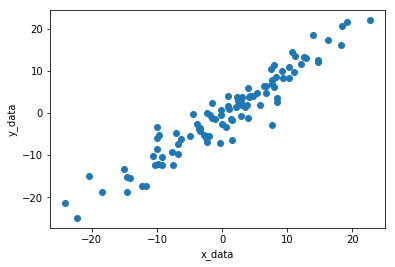

In [15]:
X = torch.randn(100, 1)*10
Y = X + torch.randn(100, 1)*3
plt.plot(X.numpy(), Y.numpy(), 'o')
plt.ylabel('y_data')
plt.xlabel('x_data')

In [0]:
import torch.nn as nn

class LR(nn.Module):

  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [17]:
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.4196]], requires_grad=True), Parameter containing:
tensor([-0.4935], requires_grad=True)]


In [18]:
x = torch.tensor([1.0])
model.forward(x)

tensor([-0.9131], grad_fn=<AddBackward0>)

In [0]:
def get_params():
  [w, b] = model.parameters()
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, Y)
  plt.show()

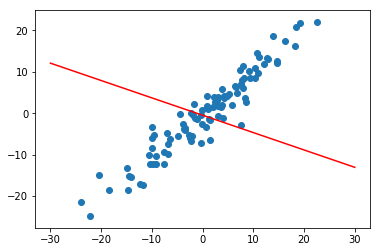

In [21]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [0]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, Y)
  # print("epoch: ", i, " loss: ", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'epoch')

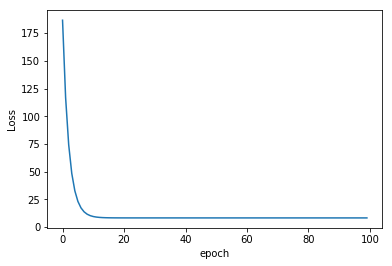

In [24]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

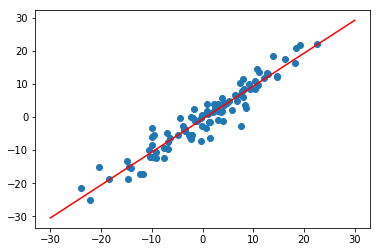

In [25]:
plot_fit("Trained Model")